## Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset

In [2]:
# for training
df = pd.read_csv('train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# Drop 'cabin' it is unimportant column
df.drop(columns='Cabin', axis=1,inplace=True)

In [8]:
# Fill 'embarked' colulmn with the most repeted value
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
reshap=df['Age'].values.reshape(-1,1)
# reshap
df['Age']=imputer.fit_transform(reshap)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## visualization of  some features

In [12]:
df.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

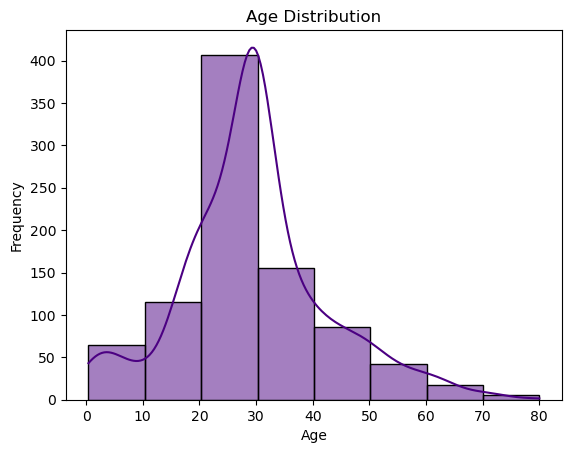

In [13]:
sns.histplot(data=df, x='Age', bins=8, kde=True, color='Indigo' )
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

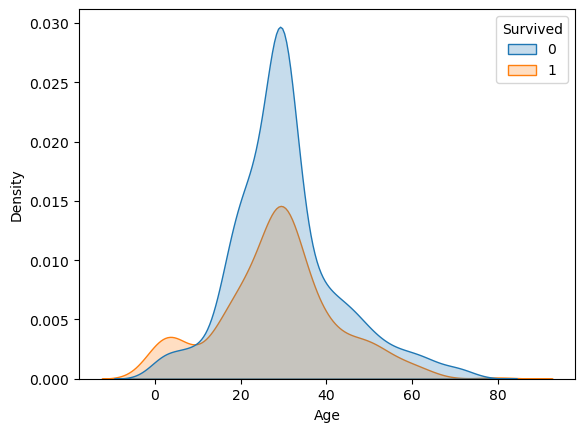

In [14]:
sns.kdeplot(data=df, x='Age', hue="Survived", fill=True)

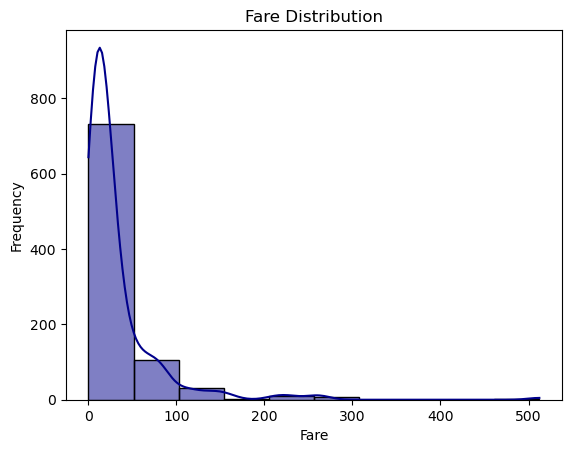

In [15]:
sns.histplot(data=df, x='Fare', bins=10, kde=True, color='darkblue'  )
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()

Text(0, 25, 'Queenstown')

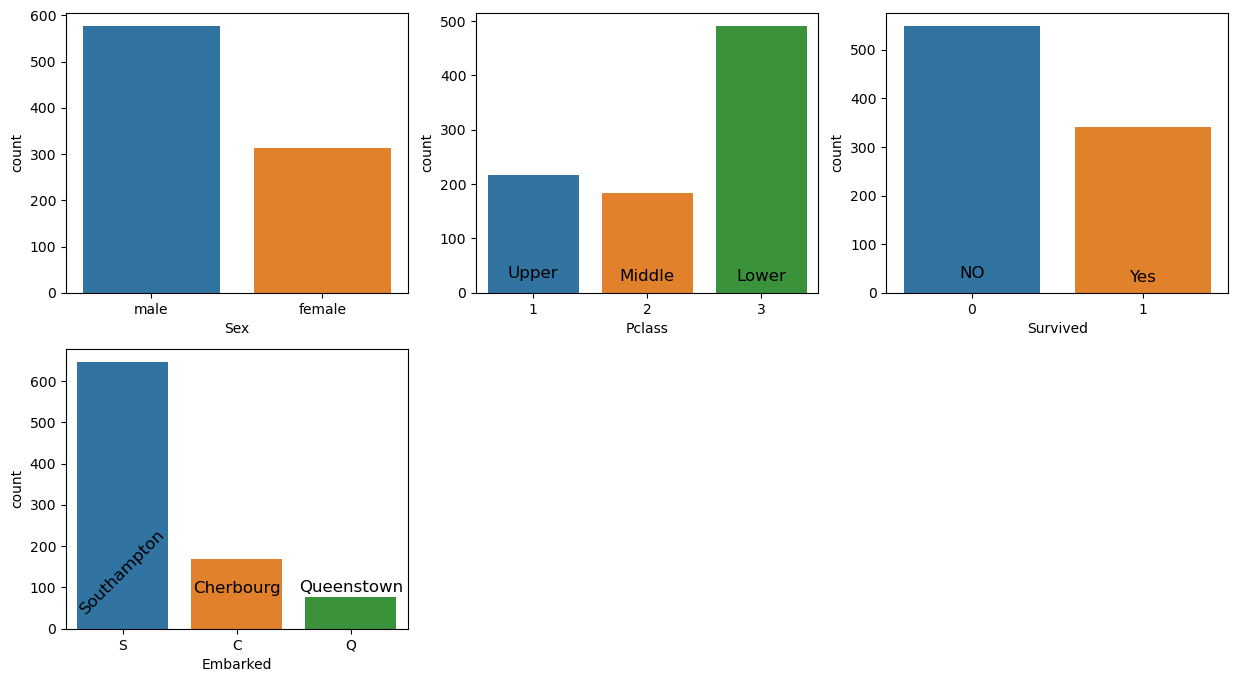

In [16]:
# Putting all columns which represent  binary indicators in one chart
plt.figure(figsize=(15, 8))  

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Sex')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Pclass')
plt.annotate('Upper', xy=(0, 2), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=12)
plt.annotate('Middle', xy=(1, 3), xytext=(0, 7), textcoords='offset points', ha='center', fontsize=12)
plt.annotate('Lower', xy=(2, 4), xytext=(0, 7), textcoords='offset points', ha='center', fontsize=12)


plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Survived')
plt.annotate('NO', xy=(0, 2), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=12)
plt.annotate('Yes', xy=(1, 3), xytext=(0, 7), textcoords='offset points', ha='center', fontsize=12)


plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Embarked')
plt.annotate('Southampton', xy=(0, 2), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=12,rotation=45)
plt.annotate('Cherbourg', xy=(1, 3), xytext=(0, 25), textcoords='offset points', ha='center', fontsize=12)
plt.annotate('Queenstown', xy=(2, 4), xytext=(0, 25), textcoords='offset points', ha='center', fontsize=12)


In [17]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

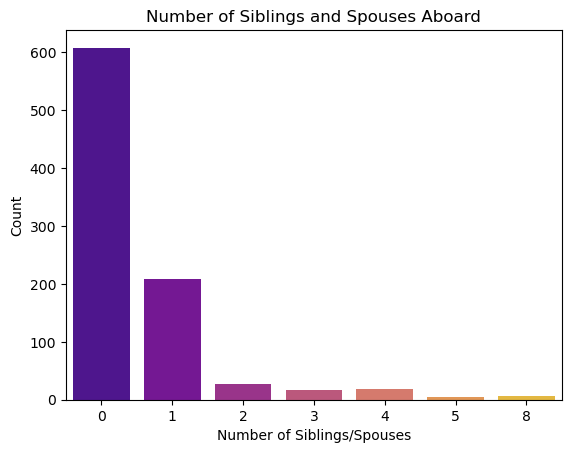

In [18]:
sns.countplot(data=df, x='SibSp', palette="plasma")
plt.title('Number of Siblings and Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

In [19]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

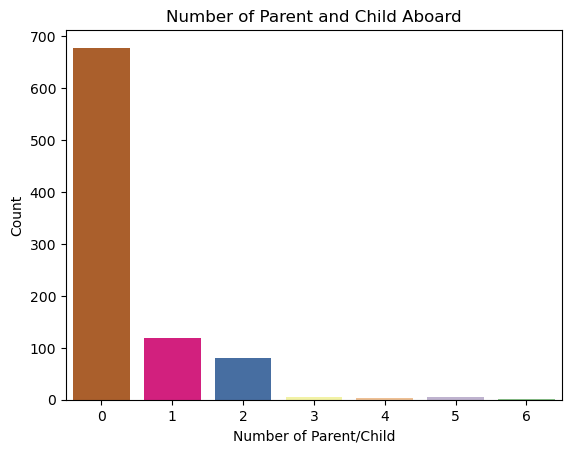

In [20]:
sns.countplot(data=df, x='Parch', palette="Accent_r")
plt.title('Number of Parent and Child Aboard')
plt.xlabel('Number of Parent/Child')
plt.ylabel('Count')
plt.show()

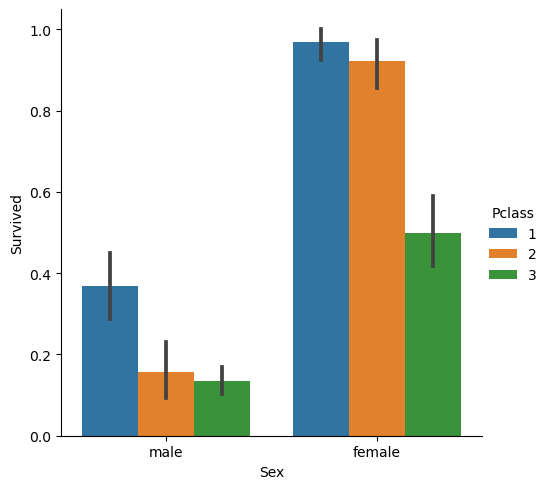

In [21]:
sns.catplot(data=df, x="Sex", y="Survived", hue="Pclass", kind="bar")

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

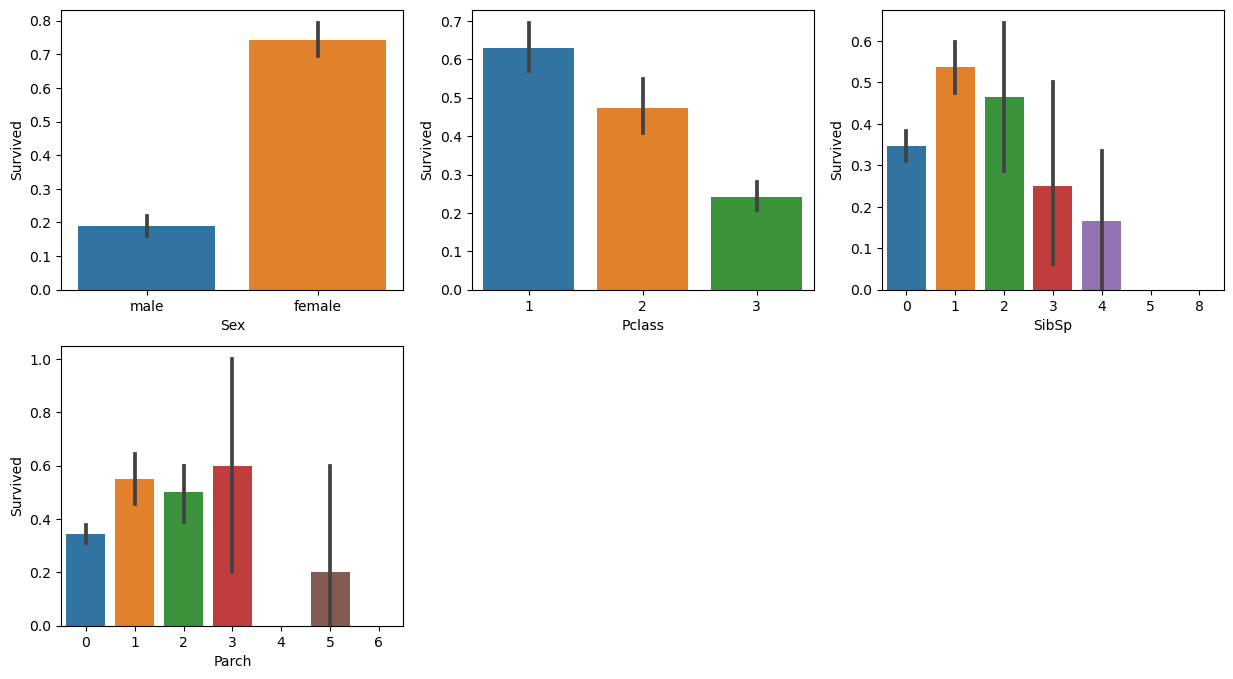

In [22]:
# Putting all columns which represent  binary indicators in one chart
plt.figure(figsize=(15, 8))  

plt.subplot(2, 3, 1)
sns.barplot(data=df, x='Sex', y='Survived')

plt.subplot(2, 3, 2)
sns.barplot(data=df, x='Pclass', y='Survived')

plt.subplot(2, 3, 3)
sns.barplot(data=df, x='SibSp', y='Survived')

plt.subplot(2, 3, 4)
sns.barplot(data=df, x='Parch', y='Survived')

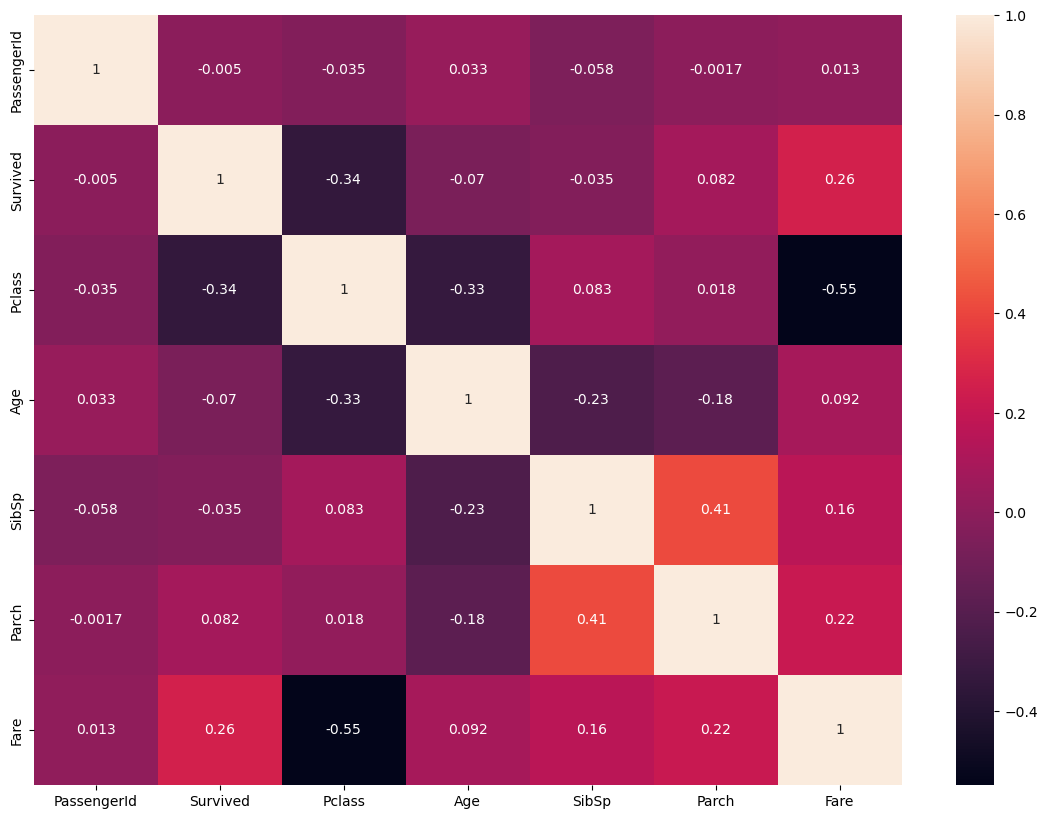

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [25]:
# df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'C':0,'Q':1,'S':2}}, inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df['Embarked'] = le.fit_transform(df['Embarked'])

### {'C':0,'Q':1,'S':2}

In [29]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [30]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
df['Sex'] = le.fit_transform(df['Sex'])

### {'male':1,'female':0}

In [32]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [34]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = df['Survived']

In [35]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import uniform , randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


# Support Vector Classifier

In [38]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_accuracy = svc_model.score(X_test, y_test)
print("SVC Accuracy:", svc_accuracy)

SVC Accuracy: 0.7206703910614525


# Logistic Regression


In [39]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_accuracy = logreg_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.7988826815642458


# Random Forest

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8324022346368715


# Standard and MinMax

In [41]:
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.transform(X_test)

In [42]:
scaler2 = MinMaxScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

# SVC

In [43]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'auto']
}

param_rand = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(uniform(0.1, 1).rvs(5))
}

# Standard, Grid, SVC

In [44]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

In [45]:
grid_search.fit(X_train_scaled1, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [46]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [47]:
best_model = grid_search.best_estimator_

In [48]:
accuracy = best_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8156424581005587


# Standard, Random, SVC

In [49]:
random_search = RandomizedSearchCV(svm_model, param_rand, n_iter=10, cv=5)

In [50]:
random_search.fit(X_train_scaled1, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021C83BF5520>,
                                        'gamma': ['scale', 'auto',
                                                  0.4420295993123925,
                                                  0.1985257792104647,
                                                  0.8305827128840976,
                                                  0.8863090838947779,
                                                  1.0477635804608583],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [51]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'C': 1.0159782724586142, 'gamma': 'auto', 'kernel': 'rbf'}


In [52]:
best_model = random_search.best_estimator_

In [53]:
accuracy = best_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8156424581005587


# MinMax, Grid, SVC

In [54]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

In [55]:
grid_search.fit(X_train_scaled2, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [56]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [57]:
best_model = grid_search.best_estimator_

In [58]:
accuracy = best_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8212290502793296


# MinMax, Random, SVC

In [59]:
random_search = RandomizedSearchCV(svm_model, param_rand, n_iter=10, cv=5)

In [60]:
random_search.fit(X_train_scaled2, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021C83BF5520>,
                                        'gamma': ['scale', 'auto',
                                                  0.4420295993123925,
                                                  0.1985257792104647,
                                                  0.8305827128840976,
                                                  0.8863090838947779,
                                                  1.0477635804608583],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [61]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'C': 8.319649101670171, 'gamma': 1.0477635804608583, 'kernel': 'rbf'}


In [62]:
best_model = random_search.best_estimator_

In [63]:
accuracy = best_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8156424581005587


# Logistic Regression

In [64]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        
    'penalty': ['l1', 'l2'],                    
    'solver': ['liblinear', 'lbfgs', 'newton-cg'] 
}

param_rand = {
    'C': uniform(0.001, 100),         
    'penalty': ['l1', 'l2'],          
    'solver': ['liblinear', 'lbfgs']  
}

# Standard, Grid, Logistic Regression

In [65]:
grid_search = GridSearchCV(lr_model, param_grid, cv=5)

In [66]:
grid_search.fit(X_train_scaled1, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']})

In [67]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [68]:
best_logreg_model = grid_search.best_estimator_

In [69]:
accuracy = best_logreg_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7877094972067039


# Standard, Random, Logistic Regression

In [70]:
random_search = RandomizedSearchCV(lr_model, param_rand, n_iter=10, cv=5)

In [71]:
random_search.fit(X_train_scaled1, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021C83BF8BB0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs']})

In [72]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'C': 90.9855236392219, 'penalty': 'l2', 'solver': 'lbfgs'}


In [73]:
best_logreg_model = random_search.best_estimator_

In [74]:
accuracy = best_logreg_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7988826815642458


# MinMax, Grid, Logistic Regression

In [75]:
grid_search = GridSearchCV(lr_model, param_grid, cv=5)

In [76]:
grid_search.fit(X_train_scaled2, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']})

In [77]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [78]:
best_logreg_model = grid_search.best_estimator_

In [79]:
accuracy = best_logreg_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7877094972067039


# MinMax, Random, Logistic Regression

In [80]:
random_search = RandomizedSearchCV(lr_model, param_rand, n_iter=10, cv=5)

In [81]:
random_search.fit(X_train_scaled2, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021C83BF8BB0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs']})

In [82]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'C': 1.1584410783147359, 'penalty': 'l2', 'solver': 'liblinear'}


In [83]:
best_logreg_model = random_search.best_estimator_

In [84]:
accuracy = best_logreg_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7932960893854749


# Random Forest

In [85]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_rand = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Standard, Grid, Random Forest

In [86]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

In [87]:
grid_search.fit(X_train_scaled1, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [88]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [89]:
best_rf_model = grid_search.best_estimator_

In [90]:
accuracy = best_rf_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8435754189944135


# Standard, Random, Random Forest

In [91]:
random_search = RandomizedSearchCV(rf_model, param_rand, n_iter=10, cv=5)

In [92]:
random_search.fit(X_train_scaled1, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C83018DF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C830C10D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021CFF407D00>})

In [93]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 150}


In [94]:
best_rf_model = random_search.best_estimator_

In [95]:
accuracy = best_rf_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8435754189944135


# MinMax, Grid, Random Forest

In [96]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

In [97]:
grid_search.fit(X_train_scaled2, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [98]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [99]:
best_rf_model = grid_search.best_estimator_

In [100]:
accuracy = best_rf_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8324022346368715


# MinMax, Random, Random Forest

In [101]:
random_search = RandomizedSearchCV(rf_model, param_rand, n_iter=10, cv=5)

In [102]:
random_search.fit(X_train_scaled2, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C83018DF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C830C10D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021CFF407D00>})

In [103]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 149}


In [104]:
best_rf_model = random_search.best_estimator_

In [105]:
accuracy = best_rf_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8435754189944135


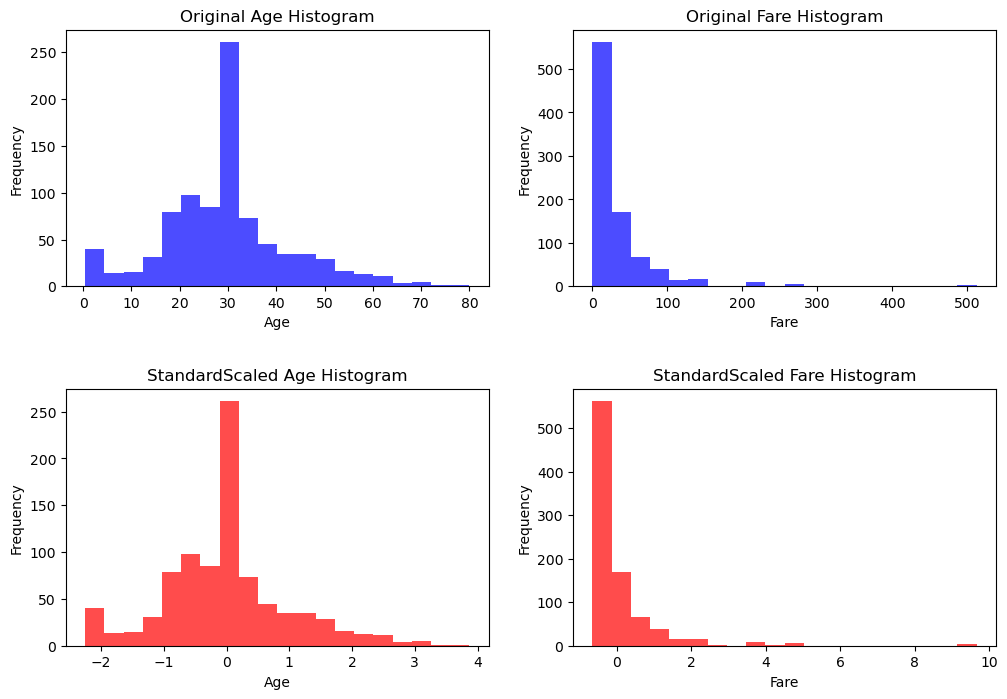

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# Original data histograms
for i, col in enumerate(numerical_columns):
    ax = axes[0, i]
    ax.hist(df[col], bins=20, color='b', alpha=0.7)
    ax.set_title(f'Original {col} Histogram')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Scaled data histograms
for i, col in enumerate(numerical_columns):
    ax = axes[1, i]
    ax.hist(scaled1[:, i], bins=20, color='r', alpha=0.7)
    ax.set_title(f'StandardScaled {col} Histogram')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()

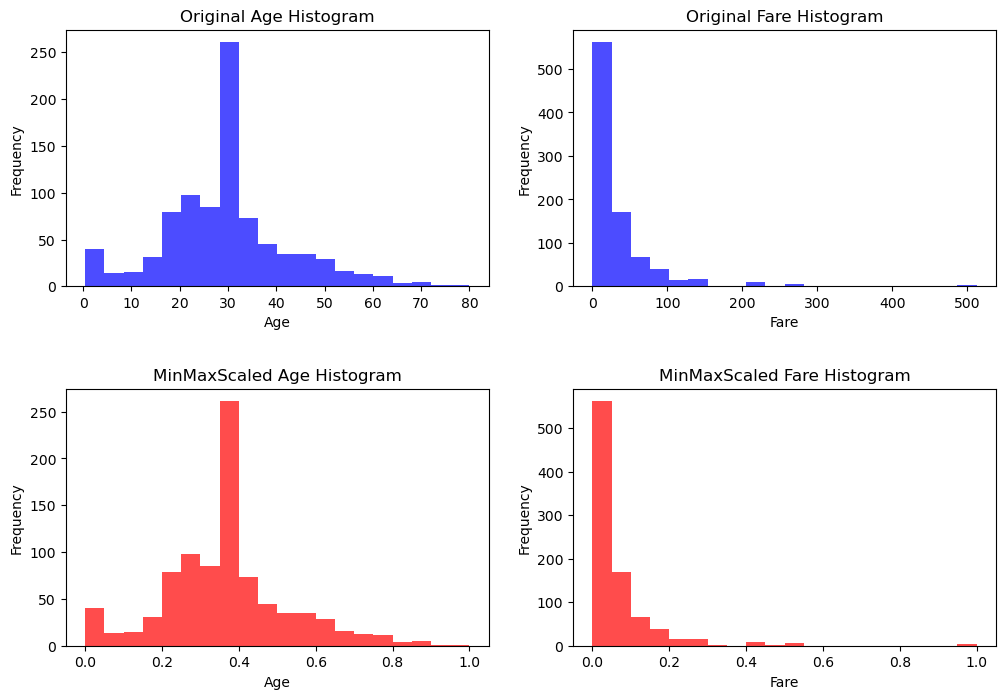

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# Original data histograms
for i, col in enumerate(numerical_columns):
    ax = axes[0, i]
    ax.hist(df[col], bins=20, color='b', alpha=0.7)
    ax.set_title(f'Original {col} Histogram')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Scaled data histograms
for i, col in enumerate(numerical_columns):
    ax = axes[1, i]
    ax.hist(scaled2[:, i], bins=20, color='r', alpha=0.7)
    ax.set_title(f'MinMaxScaled {col} Histogram')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()